In [228]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os

In [229]:
from util import keys
cid = keys['CLIENT_ID']
secret = keys['CLIENT_SECRET']
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [233]:
def create_df_from_playlist(playlist_link: str, save: int):
    playlist_URI = playlist_link.split("/")[-1].split("?")[0]
    track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]
    print(sp.playlist_tracks(playlist_URI)["items"])
    
    features = sp.audio_features(track_uris[0])[0]
    cols = ["track_name", "id", "track_pop", "artist_name", "artist_pop", "artist_genre"]
    cols.extend(features.keys())
    cols.append("save")
    df = pd.DataFrame(columns=cols)
    
    for curr_uri in track_uris:
        row = []
        track = sp.track(curr_uri)
        row.append(track["name"])
        row.append(curr_uri)
        track_pop = row.append(track["popularity"])
        artist_uri = track["artists"][0]["uri"]
        artist_info = sp.artist(artist_uri) 
        #Name, popularity, genre
        artist_name = row.append(track["artists"][0]["name"])
        artist_pop = row.append(artist_info["popularity"])
        artist_genres = row.append(artist_info["genres"])
        
        features = sp.audio_features(curr_uri)[0]
        # print(features)
        
        row.extend(features.values())
        row.append(save)
        
        new_row = pd.DataFrame([row], columns=df.columns)
        
        # Append the new row to df
        df = pd.concat([df, new_row], ignore_index=True)
    return df

In [231]:
def create_arr_from_song(song_link: str):
    song_URI = song_link.split("/")[-1].split("?")[0]
    row = []
    track = sp.track(song_URI)
    track_pop = row.append(track["popularity"])
    artist_uri = track["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri) 
    #Name, popularity, genre
    artist_pop = row.append(artist_info["popularity"])

    features = sp.audio_features(song_URI)[0]
    # print(features)

    row.extend(features.values())
    # arr = np.array(row)
    return row

# create_arr_from_song("https://open.spotify.com/track/6TW4bM3L1tyiUlCnQUkS1U?si=28567c1380254b15")

In [234]:
good = create_df_from_playlist("https://open.spotify.com/playlist/6vOYm55EbfPnFpAgZynn6I?si=9070e8f011494eb0", 1)
good2 = create_df_from_playlist("https://open.spotify.com/playlist/1bb77h4aEV7sutQ8EIvrL9?si=4ed01da7142d4f72", 1)
bad = create_df_from_playlist("https://open.spotify.com/playlist/5Dflf6jWmbFbpgjsJV4cwI?si=36def02aab974355", 0)

df = pd.concat([good, good2, bad], ignore_index=True)
# df = pd.read_csv("spotify_samples.csv")
df

[{'added_at': '2024-02-25T21:50:48Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/e0alhvu6hhl90oxbjwhfra9hu'}, 'href': 'https://api.spotify.com/v1/users/e0alhvu6hhl90oxbjwhfra9hu', 'id': 'e0alhvu6hhl90oxbjwhfra9hu', 'type': 'user', 'uri': 'spotify:user:e0alhvu6hhl90oxbjwhfra9hu'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1l2oLiukA9i5jEtIyNWIEP'}, 'href': 'https://api.spotify.com/v1/artists/1l2oLiukA9i5jEtIyNWIEP', 'id': '1l2oLiukA9i5jEtIyNWIEP', 'name': 'Carpenter Brut', 'type': 'artist', 'uri': 'spotify:artist:1l2oLiukA9i5jEtIyNWIEP'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES'

C:\Users\kiera\AppData\Local\Temp\ipykernel_33052\4281537943.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


[{'added_at': '2022-07-28T17:15:30Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/e0alhvu6hhl90oxbjwhfra9hu'}, 'href': 'https://api.spotify.com/v1/users/e0alhvu6hhl90oxbjwhfra9hu', 'id': 'e0alhvu6hhl90oxbjwhfra9hu', 'type': 'user', 'uri': 'spotify:user:e0alhvu6hhl90oxbjwhfra9hu'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3hv9jJF3adDNsBSIQDqcjp'}, 'href': 'https://api.spotify.com/v1/artists/3hv9jJF3adDNsBSIQDqcjp', 'id': '3hv9jJF3adDNsBSIQDqcjp', 'name': 'Mark Ronson', 'type': 'artist', 'uri': 'spotify:artist:3hv9jJF3adDNsBSIQDqcjp'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', '

C:\Users\kiera\AppData\Local\Temp\ipykernel_33052\4281537943.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


[{'added_at': '2024-02-25T21:58:16Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/e0alhvu6hhl90oxbjwhfra9hu'}, 'href': 'https://api.spotify.com/v1/users/e0alhvu6hhl90oxbjwhfra9hu', 'id': 'e0alhvu6hhl90oxbjwhfra9hu', 'type': 'user', 'uri': 'spotify:user:e0alhvu6hhl90oxbjwhfra9hu'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'}, 'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02', 'id': '06HL4z0CvFAxyc27GXpf02', 'name': 'Taylor Swift', 'type': 'artist', 'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}], 'available_markets': ['CA', 'US'], 'external_urls': {'spotify': 'https://open.spotify.com/album/2QJmrSgbdM35R67eoGQo4j'}, 'href': 'https://api.spotify.com/v1/albums/2QJmrSgbdM35R67eoGQo4j', 'id': '2QJmrSgbdM35R67eoGQo4j', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b2739abdf14e6058b

C:\Users\kiera\AppData\Local\Temp\ipykernel_33052\4281537943.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


,track_name,id,track_pop,artist_name,artist_pop,artist_genre,danceability,energy,key,loudness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,save
0,Day Stalker,spotify:track:4bRfxOqnnsz24rruXiJqzZ,47,Carpenter Brut,54,"[cyberpunk, darksynth, synthwave]",0.477,0.762,11,-8.164,...,0.2460,136.982,audio_features,4bRfxOqnnsz24rruXiJqzZ,spotify:track:4bRfxOqnnsz24rruXiJqzZ,https://api.spotify.com/v1/tracks/4bRfxOqnnsz2...,https://api.spotify.com/v1/audio-analysis/4bRf...,224240,4,1
1,Head Over Heels / Broken,spotify:track:0aF9m87P8Tja3NUMv4DfHt,67,Tears For Fears,74,"[new romantic, new wave, new wave pop, permane...",0.298,0.704,7,-9.905,...,0.6550,95.023,audio_features,0aF9m87P8Tja3NUMv4DfHt,spotify:track:0aF9m87P8Tja3NUMv4DfHt,https://api.spotify.com/v1/tracks/0aF9m87P8Tja...,https://api.spotify.com/v1/audio-analysis/0aF9...,302120,4,1
2,Can You Hear The Music,spotify:track:4VnDmjYCZkyeqeb0NIKqdA,77,Ludwig Göransson,66,"[nordic soundtrack, orchestral soundtrack, sou...",0.190,0.435,4,-12.456,...,0.0643,138.515,audio_features,4VnDmjYCZkyeqeb0NIKqdA,spotify:track:4VnDmjYCZkyeqeb0NIKqdA,https://api.spotify.com/v1/tracks/4VnDmjYCZkye...,https://api.spotify.com/v1/audio-analysis/4VnD...,110160,4,1
3,Heaven Up There,spotify:track:3Rl26h1HiMCV0HFHHVb2IM,58,Palace,59,[english indie rock],0.424,0.420,4,-10.536,...,0.1760,138.079,audio_features,3Rl26h1HiMCV0HFHHVb2IM,spotify:track:3Rl26h1HiMCV0HFHHVb2IM,https://api.spotify.com/v1/tracks/3Rl26h1HiMCV...,https://api.spotify.com/v1/audio-analysis/3Rl2...,437577,4,1
4,Intro,spotify:track:6XDFFeinPXgy3auyC7huoC,49,M83,70,"[french shoegaze, french synthpop, indietronic...",0.408,0.760,6,-6.844,...,0.0380,105.008,audio_features,6XDFFeinPXgy3auyC7huoC,spotify:track:6XDFFeinPXgy3auyC7huoC,https://api.spotify.com/v1/tracks/6XDFFeinPXgy...,https://api.spotify.com/v1/audio-analysis/6XDF...,322760,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Breathe,spotify:track:4QvchxEDRzAosUOkZzJGI6,45,DOE,49,[],0.558,0.394,9,-9.380,...,0.0949,56.454,audio_features,4QvchxEDRzAosUOkZzJGI6,spotify:track:4QvchxEDRzAosUOkZzJGI6,https://api.spotify.com/v1/tracks/4QvchxEDRzAo...,https://api.spotify.com/v1/audio-analysis/4Qvc...,172218,4,0
211,Girls,spotify:track:7EjL6DoRMa601VXjoyyBSE,60,Rachel Platten,61,"[post-teen pop, talent show, viral pop]",0.521,0.186,2,-8.433,...,0.5390,74.227,audio_features,7EjL6DoRMa601VXjoyyBSE,spotify:track:7EjL6DoRMa601VXjoyyBSE,https://api.spotify.com/v1/tracks/7EjL6DoRMa60...,https://api.spotify.com/v1/audio-analysis/7EjL...,171022,3,0
212,unravel,spotify:track:1rN9QoVxw5U7TJkyaUR8C1,74,TK from Ling tosite sigure,56,"[j-poprock, j-rock]",0.508,0.889,7,-2.755,...,0.3320,135.014,audio_features,1rN9QoVxw5U7TJkyaUR8C1,spotify:track:1rN9QoVxw5U7TJkyaUR8C1,https://api.spotify.com/v1/tracks/1rN9QoVxw5U7...,https://api.spotify.com/v1/audio-analysis/1rN9...,238360,4,0
213,DADDY,spotify:track:1eMVXXpNPEUdFRy5ZH7FpM,63,PSY,62,"[k-rap, korean old school hip hop]",0.762,0.869,6,-3.287,...,0.7470,132.050,audio_features,1eMVXXpNPEUdFRy5ZH7FpM,spotify:track:1eMVXXpNPEUdFRy5ZH7FpM,https://api.spotify.com/v1/tracks/1eMVXXpNPEUd...,https://api.spotify.com/v1/audio-analysis/1eMV...,230635,4,0


# Feature Engineering

In [243]:
feature_cols = ["track_pop", "artist_pop", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]

X = df[feature_cols]
y = df["save"]
y = y.astype(int)

Correlation Heatmap between features

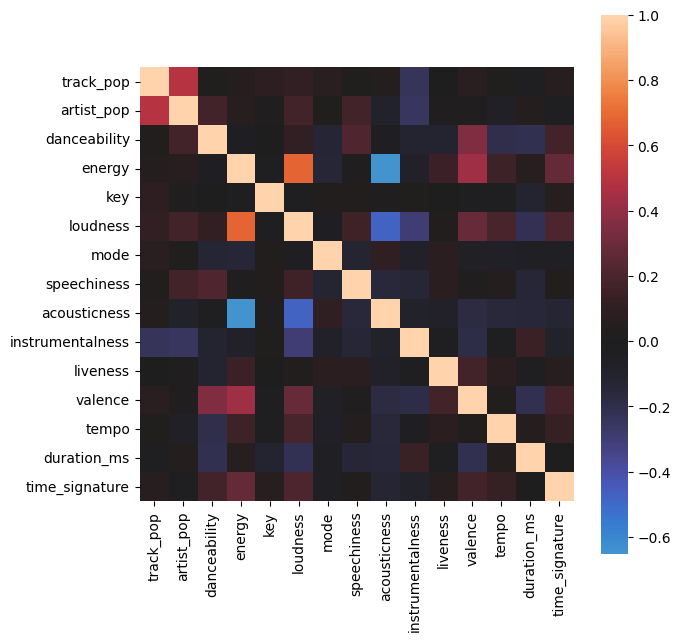

In [244]:
import seaborn as sns
plt.gcf().set_size_inches(7, 7)
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(X.corr(), center=0, annot=False, square=True)
plt.show()

In [245]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X.replace([np.inf, -np.inf], np.nan, inplace=True)

# After replacing inf values with NaN, you can choose to either drop or fill those as well
missing_or_infinite_values = X.isnull().any().any()

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

C:\Users\kiera\AppData\Local\Temp\ipykernel_33052\1383783196.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\kiera\AppData\Local\Temp\ipykernel_33052\1383783196.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


Accuracy

In [246]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred, normalize=True)

0.5925925925925926

Confusion Matrix

In [247]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred, normalize='all')

array([[0.31481481, 0.22222222],
       [0.18518519, 0.27777778]])

### Precision, Recall, F1-Score, and Support where index 0 is for the class 0 and index 1 is for the class 1

In [248]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, y_pred)

(array([0.62962963, 0.55555556]),
 array([0.5862069, 0.6      ]),
 array([0.60714286, 0.57692308]),
 array([29, 25], dtype=int64))

Conclusion: Poor precision, high accuracy

### Support Vector Machines

In [249]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred, normalize=True)
prfs = precision_recall_fscore_support(y_test, y_pred)

print("Accuracy: ", acc, "PRFS: ", prfs)

Accuracy:  0.7037037037037037 PRFS:  (array([0.68571429, 0.73684211]), array([0.82758621, 0.56      ]), array([0.75      , 0.63636364]), array([29, 25], dtype=int64))


### Random Forest

In [253]:
from sklearn.ensemble import RandomForestClassifier
RFM = RandomForestClassifier(n_estimators=10)
RFM.fit(X_train, y_train)

y_pred = RFM.predict(X_test)
acc = accuracy_score(y_test, y_pred, normalize=True)
prfs = precision_recall_fscore_support(y_test, y_pred)

print("Accuracy: ", acc, "PRFS: ", prfs)

Accuracy:  0.7777777777777778 PRFS:  (array([0.74285714, 0.84210526]), array([0.89655172, 0.64      ]), array([0.8125    , 0.72727273]), array([29, 25], dtype=int64))


### Naive Bayes

In [254]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred, normalize=True)
prfs = precision_recall_fscore_support(y_test, y_pred)

print("Accuracy: ", acc, "PRFS: ", prfs)

Accuracy:  0.6666666666666666 PRFS:  (array([0.65714286, 0.68421053]), array([0.79310345, 0.52      ]), array([0.71875   , 0.59090909]), array([29, 25], dtype=int64))


### KNN

In [255]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred, normalize=True)
prfs = precision_recall_fscore_support(y_test, y_pred)

print("Accuracy: ", acc, "PRFS: ", prfs)

Accuracy:  0.6851851851851852 PRFS:  (array([0.71428571, 0.65384615]), array([0.68965517, 0.68      ]), array([0.70175439, 0.66666667]), array([29, 25], dtype=int64))


# PREDICT A SONG HERE

In [258]:
song_link = input("Song Link: ")

arr = create_arr_from_song(song_link)
print(arr[:13], arr[18:len(arr)])
data = arr[:13]
data.extend(arr[18:])
print(data)
X_input = np.array([data])
X_input = X_input.astype(float)

RFM.predict(X_input)

[52, 41, 0.301, 0.429, 4, -8.697, 0, 0.0307, 0.228, 0.526, 0.0842, 0.202, 144.837] [286039, 4]
[52, 41, 0.301, 0.429, 4, -8.697, 0, 0.0307, 0.228, 0.526, 0.0842, 0.202, 144.837, 286039, 4]


C:\Users\kiera\dev\WillHeSave\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])